In [16]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

csv_file = '/content/drive/My Drive/TFG_AlienEmbarecRiadi/data_regression.csv'
data = pd.read_csv(csv_file, delimiter=',')

csv_file = '/content/drive/My Drive/TFG_AlienEmbarecRiadi/variable_objetivo.csv'
variable_objetivo = pd.read_csv(csv_file, delimiter=',')

print(data.head())
print(variable_objetivo.head())
print(data.shape)

      hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights    adults  children    babies      meal  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  reserved_room_type  assigned_room_type  booking_changes  deposit_type  days_in_waiting_list  customer_type  required_car_parking_spaces  total_of_special_requests  reservation_status  total_stayed_nights  weekend_nights_proportion  reservation_status_year  reservation_status_month  reservation_status_day
0  1.413571    -0.774473  -0.917802           -1.64043            0.148322                 -0.008911                  -1.685224                -0.940007             -0.802494 -1.784932 -0.258689 -0.080763 -0.070324       -1.514726             -2.558021           -0.16921               -0.102579                       -0.086689           -0.582169            0.3786

In [17]:
X = data[['reserved_room_type', 'children','arrival_date_month', 'meal', 'adults', 'distribution_channel','lead_time' ]]
y = variable_objetivo

In [18]:
from sklearn.linear_model import Ridge

ridge = Ridge()

In [19]:
ridge.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [20]:
scores = cross_val_score(ridge, X, y, cv=240)
print ('Cross-validated scores:', scores)

Cross-validated scores: [ 2.62507197e-01 -2.57908886e-01 -5.04815265e-01  8.86182109e-02
 -4.23245130e+00 -1.03703742e+01 -9.84966479e+00 -1.14212022e+00
 -5.56824807e+00 -2.44287342e+00 -1.89629582e+00 -1.85647617e+00
  2.13400522e-01  4.18682929e-01 -1.49578677e+00 -5.97817302e-01
  4.60135310e-01 -1.12896893e+00 -7.33428252e+00 -1.53695393e+00
 -6.13375857e+00 -5.97907933e-01  2.68169750e-01  5.32933741e-01
  5.15238639e-01 -6.86768470e-01 -3.60090925e+00 -8.47468639e-02
  1.74951866e-01  1.51969158e-01  3.35034109e-02  3.04548411e-01
 -3.09635299e-01  3.90305054e-01 -1.53462309e+00 -4.95155776e+00
 -6.21427576e+00 -5.41665903e+00 -6.02178061e+00 -4.41234577e-01
 -4.68935186e+00 -3.53924262e+00 -4.24906606e+00 -5.27505046e+00
 -3.74273549e+00 -1.43226044e+00 -2.18628734e+00 -9.48832629e-01
 -9.65014413e-01 -1.88431138e-01  3.59211576e-01  3.32748608e-01
 -7.73868234e-01 -1.87944560e+00 -1.72128034e+00  9.97695568e-02
  3.25118603e-01 -1.08833116e+00 -2.14159450e+00 -5.67128894e+00
 

Text(0, 0.5, 'Predictions')

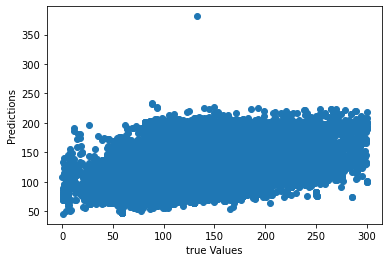

In [21]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt

ridge_predictions = cross_val_predict(ridge, X, y, cv=240)
plt.scatter(y, ridge_predictions)
plt.xlabel('true Values')
plt.ylabel('Predictions')

In [22]:
accuracy = metrics.r2_score(y, ridge_predictions)
print ('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.26666880932625836
